In [1]:
#	Importing	all	the	necessary	libraries.
import	numpy	as	np
import	pandas	as	pd
import	matplotlib.pyplot	as	plt
import	seaborn	as	sns
#%matplotlib	inline

In [2]:
data = pd.read_csv('C:\\Users\\lokes\\Downloads\\HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data	=	data.rename(columns={'average_montly_hours':'average_weekly_hours','sales':'department'})

In [7]:
data['average_weekly_hours']	=	data['average_weekly_hours']*12/52
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_weekly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


In [8]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,36.230769,3,0,1,0,sales,low
1,0.80,0.86,5,60.461538,6,0,1,0,sales,medium
2,0.11,0.88,7,62.769231,4,0,1,0,sales,medium
3,0.72,0.87,5,51.461538,5,0,1,0,sales,low
4,0.37,0.52,2,36.692308,3,0,1,0,sales,low


In [9]:
print(np.corrcoef(data['number_project'],data['average_weekly_hours']))

[[1.         0.41721063]
 [0.41721063 1.        ]]


In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,46.396232,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,11.525331,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,22.153846,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,36.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,46.153846,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,56.538462,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,71.538462,10.000000,1.000000,1.000000,1.000000


In [11]:
data.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [12]:
data[['Work_accident','left']].groupby(['Work_accident'],	as_index=False).mean().sort_values(by='left',ascending=
 0)

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [13]:
data[['department','left']].groupby(['department'],	as_index=False).mean().sort_values('left',ascending=0)

,department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444


In [14]:
 data[['salary','left']].groupby(['salary'],	as_index=False).mean().sort_values('left',ascending=0)

,salary,left
1,low,0.296884
2,medium,0.204313
0,high,0.066289


In [15]:
data[['number_project','left']].groupby(['number_project'],	as_index=False).mean().sort_values('left',ascending=0
 )

,number_project,left
5,7,1.000000
0,2,0.656198
4,6,0.557922
3,5,0.221659
2,4,0.093700
1,3,0.017756


In [16]:
data[['time_spend_company','left']].groupby(['time_spend_company'],	as_index=False).mean().sort_values('left',ascending=0)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


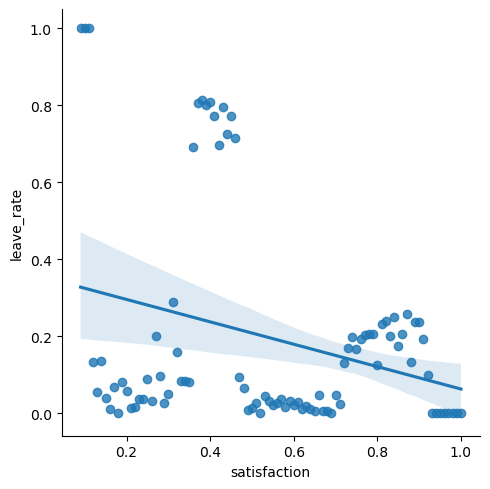

In [17]:
 leave_sat	=	data.groupby('satisfaction_level').agg({'left':lambda	x:	len(x[x==1])})
 leave_sat['total']	=	data.groupby('satisfaction_level').agg({'left':	len})
 leave_sat['leave_rate']	=	leave_sat['left']/leave_sat['total']
 leave_sat['satisfaction']	=	data.groupby('satisfaction_level').agg({'satisfaction_level':'mean'})
 g	=	sns.lmplot(x='satisfaction',y='leave_rate',data=leave_sat)

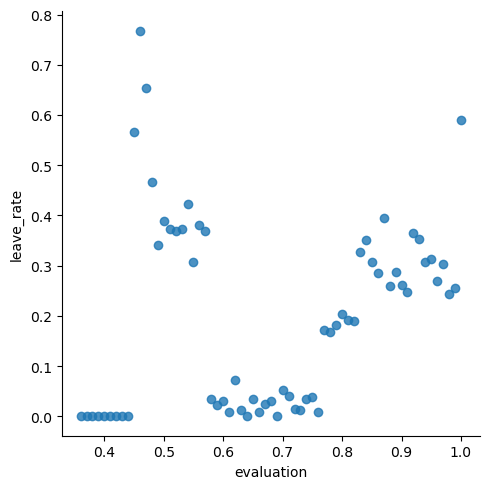

In [18]:
leave_eval	=	data.groupby('last_evaluation').agg({'left':	lambda	x:	len(x[x==1])})
leave_eval['total']	=	data.groupby('last_evaluation').agg({'left':	len})
leave_eval['leave_rate']	=	leave_eval['left']/leave_eval['total']
leave_eval['evaluation']	=	data.groupby('last_evaluation').agg({'last_evaluation':	'mean'})
gr	=	sns.lmplot(x='evaluation',	y='leave_rate',data=leave_eval,fit_reg=False)

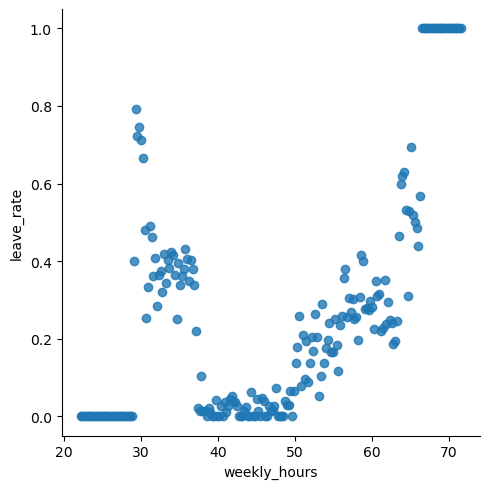

In [19]:
leave_hours	=	data.groupby('average_weekly_hours').agg({'left':	lambda	x:	len(x[x==1])})
leave_hours['total']	=	data.groupby('average_weekly_hours').agg({'left':	len})
leave_hours['leave_rate']	=	leave_hours['left']/leave_hours['total']
leave_hours['weekly_hours']	=	data.groupby('average_weekly_hours').agg({'average_weekly_hours':	'mean'})
grid=sns.lmplot(x='weekly_hours',	y='leave_rate',data=leave_hours,fit_reg=False)

In [20]:
data[['department','average_weekly_hours']].groupby(['department'],	as_index=False).mean().sort_values('average_weekly_hours',	ascending=False)

,department,average_weekly_hours
9,technical,46.730175
0,IT,46.665225
4,management,46.442125
2,accounting,46.422224
7,sales,46.364158
1,RandD,46.338579
8,support,46.328813
6,product_mng,46.145915
5,marketing,46.012103
3,hr,45.850317


In [21]:
data.promotion_last_5years.value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [22]:
data	=	data.drop(['promotion_last_5years'],	axis=1)

In [23]:
 data	=	data.drop(['Work_accident','department','average_weekly_hours'],	axis=1)

In [24]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'left', 'salary'],
      dtype='object')

In [25]:
#	Banding	'number_project'
bins=[0,2,5,10]
names=[1,0,1]
data['abnormal_proj']	=	pd.cut(data['number_project'],bins,labels=names,ordered=False)
 #	banding	years	at	the	firm
bins2=[0,1,2,3,4,5,6,100]
names2=['1','2','3','4','5','6','7']
data['years_at_company']=pd.cut(data['time_spend_company'],bins2,labels=names2,ordered=False)
 #	banding	last_evaluation
bins3=[0,.6,.8,1]
names3=[1,0,1]
data['abnormal_eval']=pd.cut(data['last_evaluation'],bins3,labels=names3,ordered=False)
data.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,0.53,2,3,1,low,1,3,1
1,0.80,0.86,5,6,1,medium,0,6,1
2,0.11,0.88,7,4,1,medium,1,4,1
3,0.72,0.87,5,5,1,low,0,5,1
4,0.37,0.52,2,3,1,low,1,3,1


In [26]:
data	=	data.drop(['number_project','time_spend_company','last_evaluation'],axis=1)
data.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,low,1,3,1
1,0.80,1,medium,0,6,1
2,0.11,1,medium,1,4,1
3,0.72,1,low,0,5,1
4,0.37,1,low,1,3,1


In [27]:
data['salary']	=	data['salary'].map({'low':0,'medium':1,'high':2}).astype(int)
pd.to_numeric(data['abnormal_proj'],	errors='coerce')
pd.to_numeric(data['years_at_company'],	errors='coerce')
pd.to_numeric(data['abnormal_eval'],	errors='coerce')
data.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,0,1,3,1
1,0.80,1,1,0,6,1
2,0.11,1,1,1,4,1
3,0.72,1,0,0,5,1
4,0.37,1,0,1,3,1


In [28]:
pip	install	imblearn

Note: you may need to restart the kernel to use updated packages.


In [29]:
from	imblearn.over_sampling	import	SMOTE
from sklearn.datasets import make_classification
# Example of defining X_train and Y_train
from sklearn.model_selection import train_test_split
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Assuming you have X and y as your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm	=	SMOTE(random_state	=	2)
X_train,Y_train	=	sm.fit_resample(X_train,	Y_train.ravel())

In [30]:
from	sklearn.model_selection	import	train_test_split
X_train,X_test,Y_train,Y_test	=	train_test_split(data,data['left'],shuffle=True,test_size=0.2,random_state=42)
X_train	=	X_train.drop('left',axis=1)
X_test	=	X_test.drop('left',axis=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11999, 5) (11999,)
(3000, 5) (3000,)


In [31]:
from	sklearn.linear_model	import	LogisticRegression
from	sklearn.svm	import	SVC
from	sklearn.neighbors	import	KNeighborsClassifier
from	sklearn.naive_bayes	import	GaussianNB
from	sklearn.tree	import	DecisionTreeClassifier

In [32]:
print(pd.DataFrame(X_test).dtypes)

satisfaction_level     float64
salary                   int32
abnormal_proj         category
years_at_company      category
abnormal_eval         category
dtype: object


In [33]:
print(pd.DataFrame(X_train).isnull().sum())
print(pd.DataFrame(X_test).isnull().sum())

# Handle missing values, e.g., by imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

satisfaction_level    0
salary                0
abnormal_proj         0
years_at_company      0
abnormal_eval         0
dtype: int64
satisfaction_level    0
salary                0
abnormal_proj         0
years_at_company      0
abnormal_eval         0
dtype: int64


In [35]:
#	Logistic	Regression
from	sklearn.linear_model	import	LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X, y = make_classification(n_classes=2, n_samples=1000, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg	=	LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred	=	logreg.predict(X_test)
acc_log	=	round(logreg.score(X_train,Y_train)*100,2)
acc_log

88.14

In [37]:
#	SVC
svc	=	SVC()
svc.fit(X_train,	Y_train)
Y_pred	=	svc.predict(X_test)
acc_svc	=	round(svc.score(X_train,	Y_train)	*	100,	2)
acc_svc

94.14

In [39]:
gaussian	=	GaussianNB()
gaussian.fit(X_train,	Y_train)
Y_pred	=	gaussian.predict(X_test)
acc_gaussian	=	round(gaussian.score(X_train,	Y_train)	*	100,	2)
acc_gaussian

86.14

In [41]:
#	Decision	Tree
decision_tree	=	DecisionTreeClassifier()
decision_tree.fit(X_train,	Y_train)
Y_pred	=	decision_tree.predict(X_test)
acc_decision_tree	=	round(decision_tree.score(X_train,	Y_train)	*	100,	2)
acc_decision_tree

100.0

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Generate synthetic dataset
X, y = make_classification(n_classes=2, n_samples=1000, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values if necessary
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train models
models = {
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train each model and compute accuracy
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    accuracy = round(model.score(X_test, Y_test) * 100, 2)
    accuracy_scores[model_name] = accuracy

# Create DataFrame
models_df = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Score': list(accuracy_scores.values())
})

# Sort DataFrame by Score in descending order
models_df = models_df.sort_values(by='Score', ascending=False)
print(models_df)


                     Model  Score
2      Logistic Regression  85.00
4            Decision Tree  85.00
0  Support Vector Machines  84.33
3              Naive Bayes  81.33
1                      KNN  77.00
